In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance_claims.csv')

In [3]:
print(df.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
linhas, colunas = df.shape
print(f"O nosso conjunto de dados tem {linhas} linhas (sinistros) e {colunas} colunas (características).")

O nosso conjunto de dados tem 1000 linhas (sinistros) e 40 colunas (características).


In [6]:
print("\n--- Estatísticas Descritivas (Colunas Numéricas) ---")
print(df.describe())


--- Estatísticas Descritivas (Colunas Numéricas) ---
       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.16739

In [7]:
print(df['fraud_reported'].value_counts())

fraud_reported
N    753
Y    247
Name: count, dtype: int64


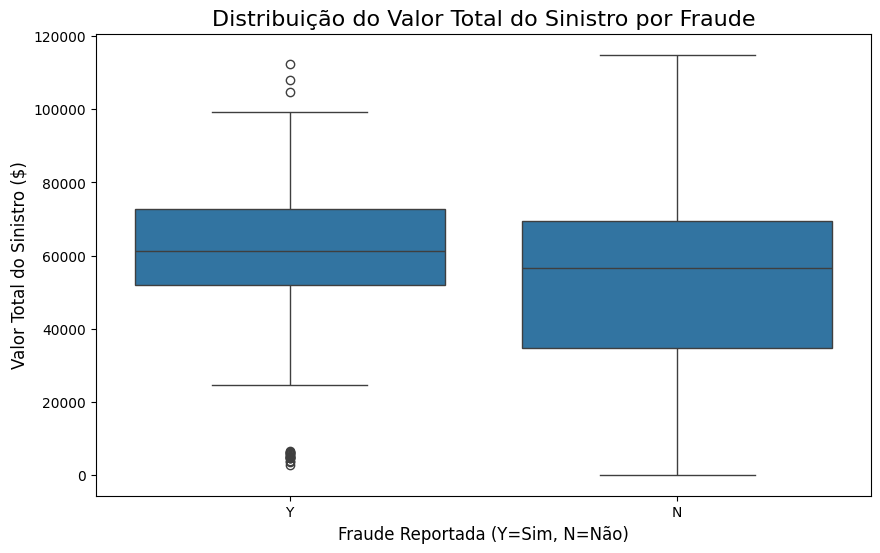

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.title('Distribuição do Valor Total do Sinistro por Fraude', fontsize=16)
plt.xlabel('Fraude Reportada (Y=Sim, N=Não)', fontsize=12)
plt.ylabel('Valor Total do Sinistro ($)', fontsize=12)
plt.show()

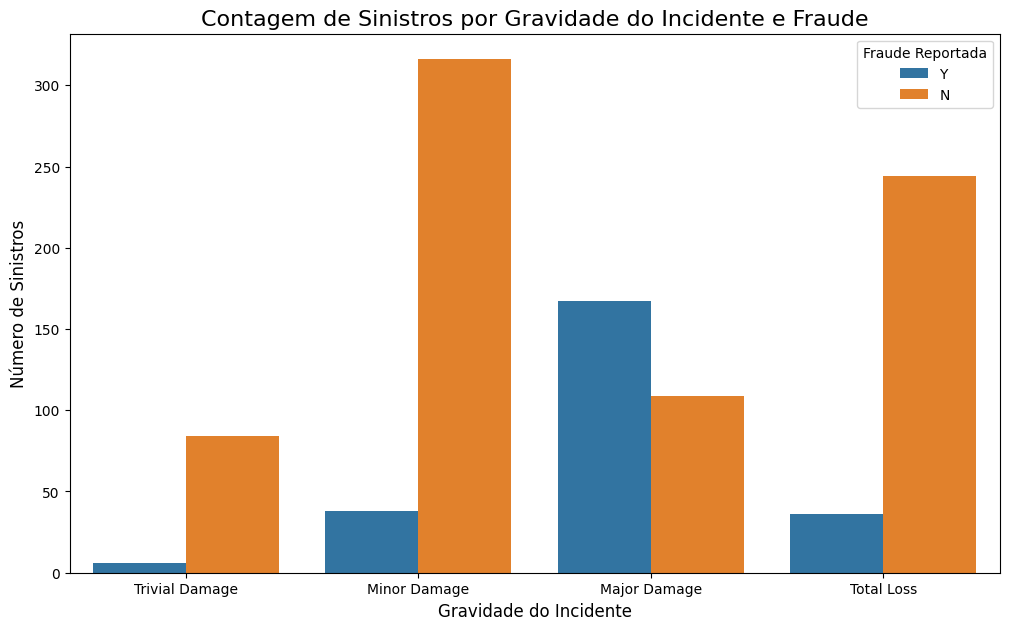

In [9]:
plt.figure(figsize=(12, 7))
sns.countplot(x='incident_severity', hue='fraud_reported', data=df, order=['Trivial Damage', 'Minor Damage', 'Major Damage', 'Total Loss'])
plt.title('Contagem de Sinistros por Gravidade do Incidente e Fraude', fontsize=16)
plt.xlabel('Gravidade do Incidente', fontsize=12)
plt.ylabel('Número de Sinistros', fontsize=12)
plt.legend(title='Fraude Reportada')
plt.show()

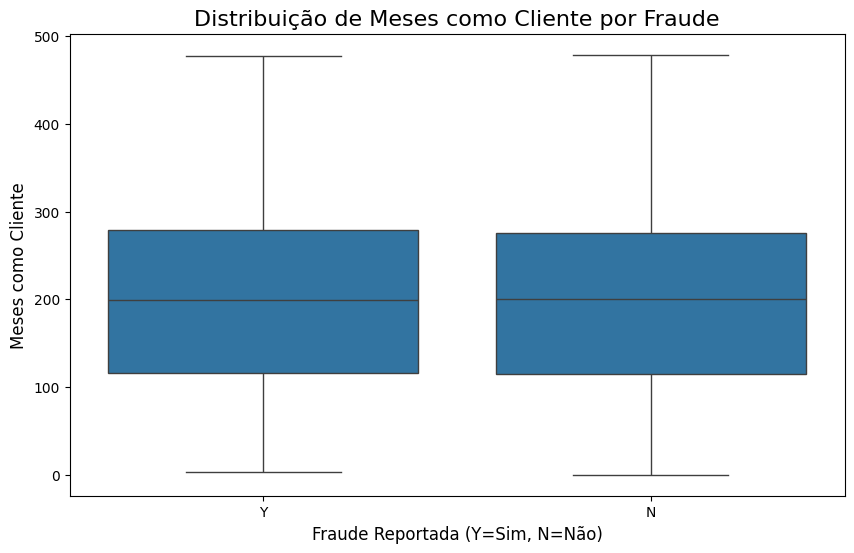

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_reported', y='months_as_customer', data=df)
plt.title('Distribuição de Meses como Cliente por Fraude', fontsize=16)
plt.xlabel('Fraude Reportada (Y=Sim, N=Não)', fontsize=12)
plt.ylabel('Meses como Cliente', fontsize=12)
plt.show()

In [11]:
import numpy as np

In [12]:
df_processed = df.copy()

In [13]:
#vou remover as colunas que não fazem diferença na nossa predição
colunas_para_remover = ['policy_number', 'policy_bind_date', 'incident_location', '_c39']
df_processed.drop(columns=colunas_para_remover, inplace=True)

In [14]:
# O dataset usa '?' para representar dados faltantes. Vamos padronizar para 'NaN'.
df_processed.replace('?', np.nan, inplace=True)

# vamos Preencher valores nulos em colunas categóricas com o valor mais frequente (moda)
# Fizemos isso para as colunas que identificamos com valores '?'
for col in ['collision_type', 'property_damage', 'police_report_available']:
    mode = df_processed[col].mode()[0]
    df_processed[col].fillna(mode, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_3656\541261741.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(mode, inplace=True)


In [15]:
df_processed['fraud_reported'] = df_processed['fraud_reported'].map({'Y': 1, 'N': 0})

In [16]:
# Agora, usamos 'get_dummies' para converter todas as outras colunas de texto em números
# Isso cria novas colunas para cada categoria (one-hot encoding)
df_processed = pd.get_dummies(df_processed, drop_first=True)

In [17]:
print(df_processed.head())

   months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   umbrella_limit  insured_zip  capital-gains  capital-loss  \
0               0       466132          53300             0   
1         5000000       468176              0             0   
2         5000000       430632          35100             0   
3         6000000       608117          48900        -62400   
4         6000000       610706          66000        -46000   

   incident_hour_of_the_day  number_of_vehicles_involved  ...  \
0                         5                            1  ...   
1                         8                            1  

In [18]:
X = df_processed.drop('fraud_reported', axis=1)
y = df_processed['fraud_reported']

print(f"Dimensões de X: {X.shape}")
print(f"Dimensões de y: {y.shape}")

Dimensões de X: (1000, 200)
Dimensões de y: (1000,)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

modelo = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

modelo.fit(X_train, y_train)

c:\Users\pedro\OneDrive\Desktop\projeto de seguro\seguro_automoveis\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [21]:
y_pred = modelo.predict(X_test)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.54      0.65       226
           1       0.31      0.62      0.41        74

    accuracy                           0.56       300
   macro avg       0.56      0.58      0.53       300
weighted avg       0.69      0.56      0.59       300


Matriz de Confusão:


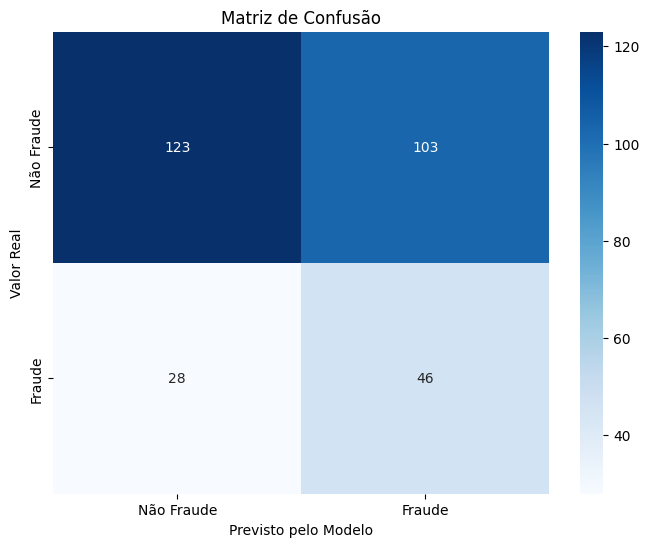

In [22]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Previsto pelo Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

Com esse modelo conseguimos atingir um bom resutado em relação as fraudes mas nao atingimos muito bem os clientes que realmente estavam precisando da requisisão!

Então agora tentaremos fazeer um modelo mais robusto pois como temos muitas colunas para avaliar podemos usar classificação por floresta aleatoria.

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
modelo_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

modelo_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_pred_rf = modelo_rf.predict(X_test)


Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       226
           1       0.50      0.11      0.18        74

    accuracy                           0.75       300
   macro avg       0.63      0.54      0.52       300
weighted avg       0.70      0.75      0.69       300


Matriz de Confusão (Random Forest):


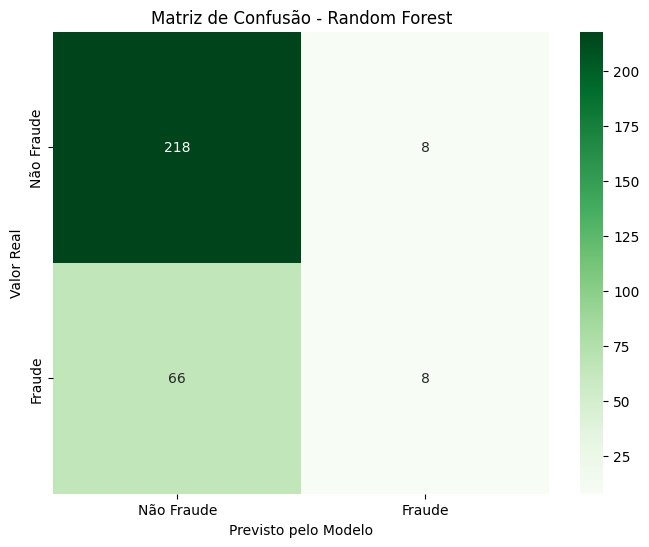

In [26]:
print("\nRelatório de Classificação (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nMatriz de Confusão (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
    
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Previsto pelo Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

nosso modelo melhorou consideralmente em relação ao outro o recall do não fraude ficou muito bom porem o de fraude ficou pessimo!

vamos tentar mudar o ponto de corte para tentar pegarmos mais fraudes legitimas!

In [27]:
probabilidades = modelo_rf.predict_proba(X_test)[:, 1]
novo_ponto_de_corte = 0.30

In [28]:
y_pred_ajustado = [1 if prob > novo_ponto_de_corte else 0 for prob in probabilidades]


Novo Relatório de Classificação (Random Forest Ajustado):
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       226
           1       0.60      0.74      0.66        74

    accuracy                           0.81       300
   macro avg       0.75      0.79      0.77       300
weighted avg       0.83      0.81      0.82       300


Nova Matriz de Confusão (Random Forest Ajustado):


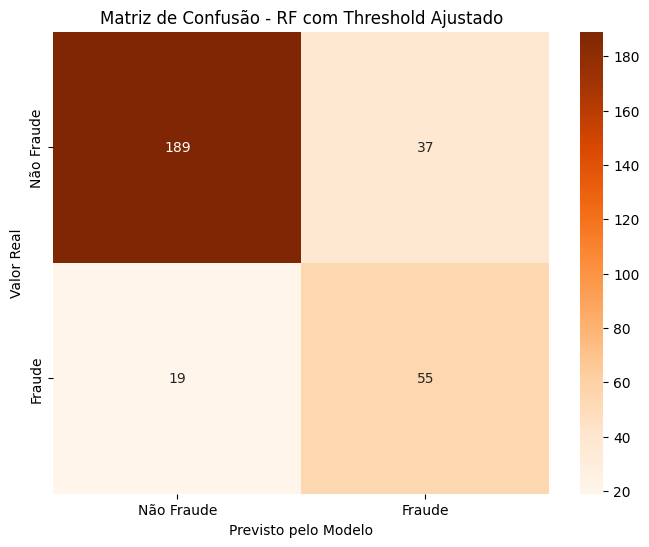

In [29]:
print("\nNovo Relatório de Classificação (Random Forest Ajustado):")
print(classification_report(y_test, y_pred_ajustado))

print("\nNova Matriz de Confusão (Random Forest Ajustado):")
cm_ajustado = confusion_matrix(y_test, y_pred_ajustado)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ajustado, annot=True, fmt='d', cmap='Oranges', xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Previsto pelo Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - RF com Threshold Ajustado')
plt.show()

um dos melhores resultados que consegui foi com ponto de corte entre 25 a 30%, não diminui e nem aumentei muito alem disso pos começa a gerar overfiting induzindo muito para um só resultado.

In [30]:
import joblib

In [31]:
nome_arquivo = 'modelo_fraude_rf.joblib'
joblib.dump(modelo_rf, nome_arquivo)

['modelo_fraude_rf.joblib']

In [32]:
lista_de_colunas_final = X_train.columns.tolist()
print(lista_de_colunas_final)
print("--------------------")

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_state_IN', 'policy_state_OH', 'policy_csl_250/500', 'policy_csl_500/1000', 'insured_sex_MALE', 'insured_education_level_College', 'insured_education_level_High School', 'insured_education_level_JD', 'insured_education_level_MD', 'insured_education_level_Masters', 'insured_education_level_PhD', 'insured_occupation_armed-forces', 'insured_occupation_craft-repair', 'insured_occupation_exec-managerial', 'insured_occupation_farming-fishing', 'insured_occupation_handlers-cleaners', 'insured_occupation_machine-op-inspct', 'insured_occupation_other-service', 'insured_occupation_priv-house-serv', 'insured_occupation_prof-specialty', 'insured_occupation_protective-serv', 'in